In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output

In [4]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/hexapod_simulation/')  # sys path to files
from simulation import Sim  # class from simulation.py

Solver: raw; function values as ics
Solver: sci; function values as ics


../src/hexapod_simulation/model.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(a * (b - x)))



-------------------------------------------------------------------------------
dim:  6                       sets:  6                      a:  5                         
g:  6.7                       y_bar:  0.1333                tau_x:  0.13                  
tau_b:  0.2                   b_dot neg.:  -0.6667          b_dot pos.:  4.3333           
gamma:  1.7308                theta:  0.65                  g_min:  1.0808                
g_r:  3.2021                  g_dy:  6.9068                 dy:  0.001                    
-------------------------------------------------------------------------------

gait_matrix:

 [[ 1.   0.6  0.2 -0.2 -0.6 -1. ]
 [-1.   1.   0.6  0.2 -0.2 -0.6]
 [-0.6 -1.   1.   0.6  0.2 -0.2]
 [-0.2 -0.6 -1.   1.   0.6  0.2]
 [ 0.2 -0.2 -0.6 -1.   1.   0.6]
 [ 0.6  0.2 -0.2 -0.6 -1.   1. ]] 




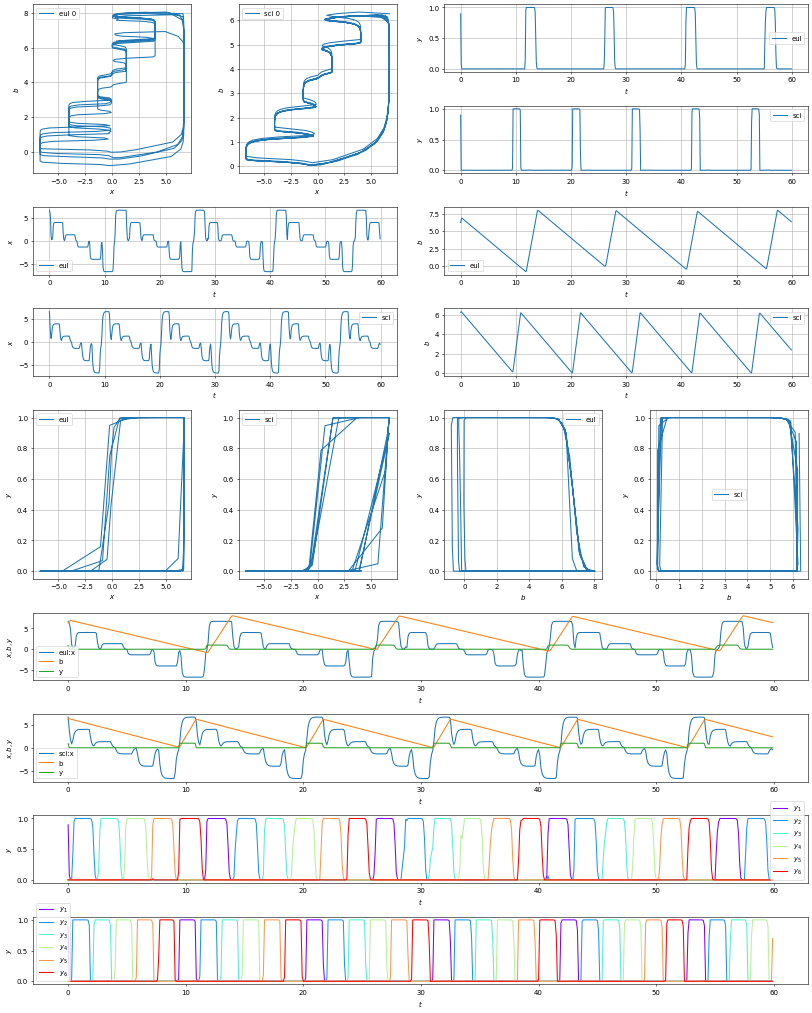

In [6]:
# Simulation for oscillator coupling with a coupling matrix via a dynamical system
# The numerical integration methods Euler method, with various options and extensions and
# the Runge-Kutta-4 method (another method can be chosen in the solver function options)
# with open loop feedback and no horizontal extension are compared
#
# Arguments:
# dim: row/column size of coupling/gait matrix; number of oscillators
# sets: number of out of phase oscillators
# g: scaling factor for membrane potential feedback
# y_bar: mean neural activation
# tau_b: time constant of neueral bias
# tau_x: time constant of membrane potential
# tau_sens: time constant of delayed integrated sensors
# y_h_max: value is < 1, maximal symmetrical horizontal neural activation
# step_size: numerical integration step size for Euler method
# dy: sensitivity of neural activation regarding the difference of neural bias and membrane potential b-x
# t_end: result timeline in seconds
# identity_inphase: options:'identity', inphase' or None;
#                          ' identity': identity matrix, 'inphase': matrix filled with ones,
# None: default coupling matrix determined by dim and sets
# test: boolean, using test matrix, that is or can be defined in gait.py
# transpose: transposes defined coupling matrix
# shuffle: boolean, shuffles the default oscillator phase sequence and creates a corresponding new coupling matrix
# vsensor: boolean, activates closed loop feedback with vertical sensors
# hsensor: boolean, activates closed loop feedback with horizontal sensors
# noise: boolean, adds perturbation to the sensor values
# print_params: boolean, printing option for the used parameters and various reference values
# plot: boolean, plotting option for the summarizing plot
# eul_ics_fun: boolean, use the implemented general initial conditions function for the initial conditions
#              for the Euler method
# sci_ics_fun: same as eul_ics_fun for the Scipy Runge-Kutta solver
# rnd_ics: boolean, randomized initial conditions within a confined interval
# save: save test data file for analysis
# transpose_time: float between 0 and 1, transposes the gait matrix at t = transpose_time * t_end
# sensor_time: float between 0 and 1, increases the time constant from at t = transpose_time * t_end
#              of the simulated sensors only for y=0 (for the 'power stroke')
# constant_time_delay: boolean, sets the sensor values with a constant time delay equal to the neural activation
# ics_save: save ics from this run for being able to load it in the next loop iteration as npy file
#
# Accessable data variables:
# Euler method: eul_t, eul_dt, eul_x, eul_b, eul_y, eul_y_h, eul_sensor_act_vertical, eul_sensor_act_horizontal
# Scipy Runge-Kutta-4: sci_t, sci_x, sci_b, sci_y
#
# all available class variables can be seen with:
# attrs = vars(s)
# for key in attrs:
#     print(key)
# attrs[str(key)] # for reading the value
#
# plots can be changed in plots.py

# Parameters for the dynamical system
a = 5
dim = 6
sets = 6
g = 6.7
y_bar = 0.8 * 1 / sets
tau_b = 0.2
tau_x = 0.13  # 0.5 * tau_b / (a * (y_bar - y_bar**2))
step_size = 0.1

# initialize for solving
s = Sim(dim=dim,
        sets=sets,
        g=g,
        y_bar=y_bar,
        a=a,
        tau_x=tau_x,
        tau_b=tau_b,
        tau_sens=1,
        y_h_max=0.9,
        step_size=step_size,
        dy=0.001,
        t_end=60,
        identity_inphase=None,
        test=False,
        transpose=False,
        shuffle=False,
        vsensor=False,
        hsensor=True,
        noise=True,
        eul_ics_fun=True,
        sci_ics_fun=True,
        rnd_ics=False,
        transpose_time=0,
        sensor_time=0,
        constant_time_delay=True)

loops = 1  # loop as a replacement for longer simulation time with saved initial conditions
# because the saved initial conditions are used for the next iteration step
# used with ics_save=True
for i in range(loops):
    clear_output(wait=True)  # jupyter notebook
    # output cleared for better display, otherwise the output is one after another

    # solve
    x = s.solve(print_params=True,
                plot=True,
                save=True,
                ics_save=True)

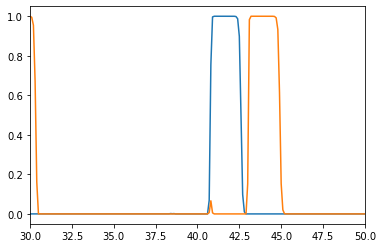

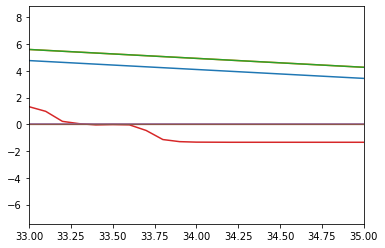

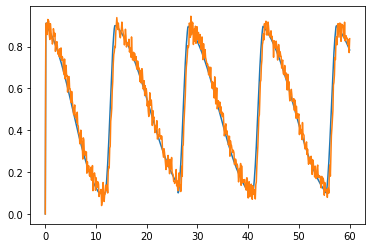

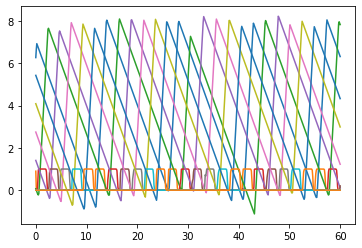

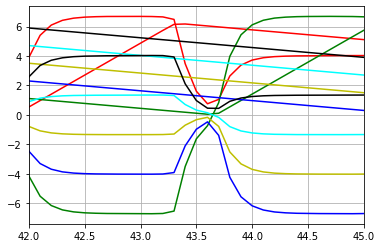

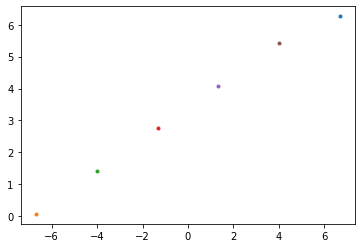

In [7]:
# Example plots

plt.plot(s.eul_t, s.eul_y[0], s.eul_t, s.eul_y[1])
plt.xlim(30,50)
#plt.ylim(3,3.)
plt.show()
plt.close()


plt.plot(s.eul_t, s.eul_b[0], s.eul_t, s.eul_b[1], s.eul_t, s.eul_b[1], s.eul_t, s.eul_x[0], s.eul_t, s.eul_y[0], s.eul_t, s.eul_y[1])
plt.xlim(33,35)
#plt.ylim(-0.1,1.1)
plt.show()
plt.close()


plt.plot(s.eul_t, s.eul_y_h[0], s.eul_t, s.eul_sensor_act_horizontal[0])
#plt.xlim(20,40)
plt.show()
plt.close()


for i in range(6):
    plt.plot(s.eul_t, s.eul_b[i])
    plt.plot(s.eul_t, s.eul_y[i])
# plt.xlim(0, 3)
plt.show()
plt.close()


c = ['r', 'g', 'b', 'y', 'cyan', 'black']
for i in range(6):
    plt.plot(s.sci_t, s.sci_x[i], c[i])
    plt.plot(s.sci_t, s.sci_b[i], c[i])
plt.xlim(42, 45)
plt.grid(True)
plt.show()
plt.close()


for i in range(6):
    plt.plot(s.sci_x[i][0:1], s.sci_b[i][0:1], '.')
plt.show()
plt.close()